In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Будем рассматривать распределение Парето.

In [57]:
# зададим коэффициент распределения:
k = 2.6

График функции плотности вероятности с гистограммой:

1.60120507694


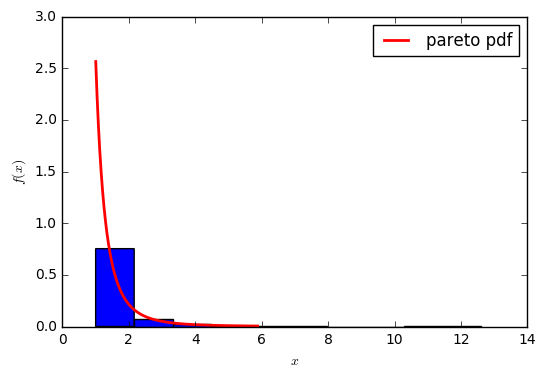

In [36]:
# плотность вероятности
x = np.linspace(sts.pareto.ppf(0.01, k), sts.pareto.ppf(0.99, k), 1000)
pdf = sts.pareto.pdf(x, k)
plt.plot(x, pdf, 'r-', lw=2, label='pareto pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
# гистограмма выборки
samples = sts.pareto.rvs(k, size=1000)
plt.hist(samples, normed=True)
# выборочное среднее
xn = sum(samples) / 1000
print xn

In [45]:
# сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних,
# поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения
def genN(n):
    xs = [sum(sts.pareto.rvs(k, size=n)) / n for i in xrange(0, 1000)]
    plt.hist(xs, normed=True, alpha=0.3)
    # зададим нормальное распределение
    mean, var = sts.pareto.stats(k, moments='mv')
    sigma = np.sqrt(mean / n)
    norm_rv = sts.norm(loc=mean, scale=sigma)
    x = np.linspace(-4, 4, n)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf,'r-', lw=2)
    plt.ylabel('f(x)')
    plt.xlabel('$x$')

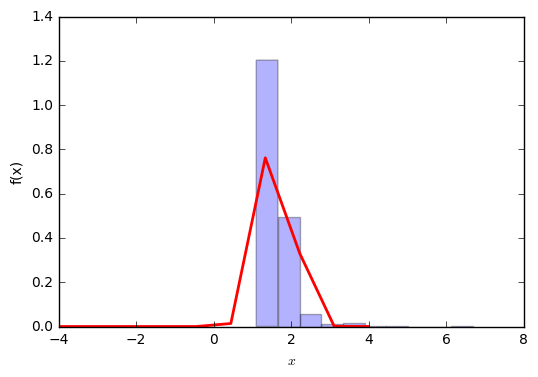

In [46]:
genN(10)

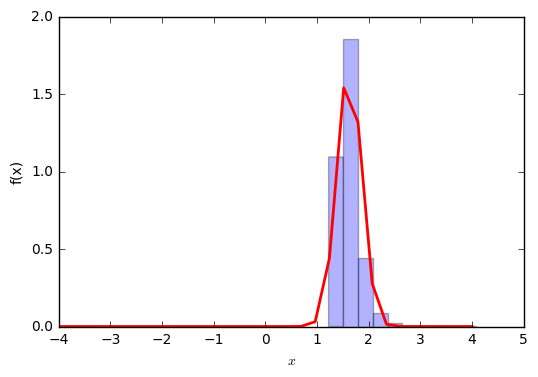

In [47]:
genN(30)

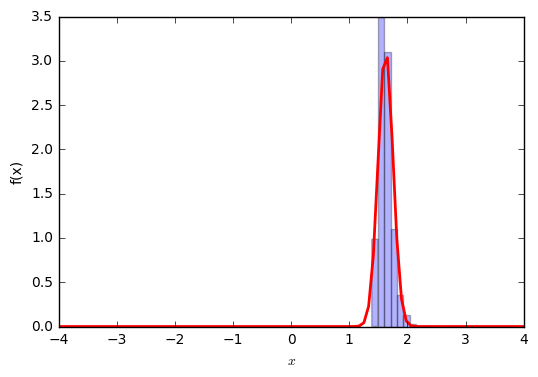

In [48]:
genN(100)

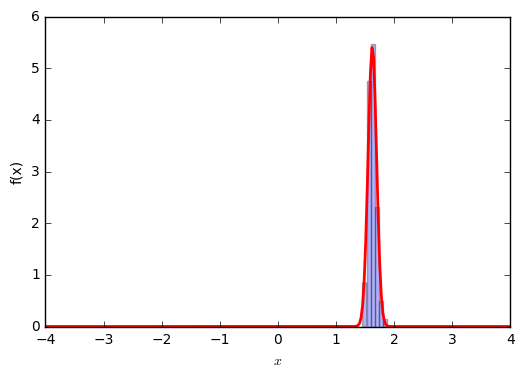

In [56]:
genN(300)

# Вывод
Даже такое непохожое на нормальное распределение аппроксимируется с помощью ЦПТ. Распределение скошенное, поэтому для хорошей аппроксимации требуется большой объем выборки.